In [1]:
%matplotlib inline

In [2]:
l = 30 # in cm
t0 = 0.21116 # in s
tf = 49.89776 # in s
r = 1.25 # in cm
e = 0.6 * r
v = l / (tf - t0)

In [3]:
import numpy as np
t1 = np.array([5.3840, 7.61510, 9.66310, 11.4124, 13.3751, 15.1671, 16.2338, 18.0684, 19.5191], dtype=np.float64)
t2 = np.array([5.12850, 6.23783, 6.66529, 7.23110, 8.21243, 8.85243, 9.57776, 10.0898, 10.9004], dtype=np.float64)
f1 = np.array([328.125, 351.563, 375.000, 398.438, 421.875, 445.313, 468.750, 492.188, 515.625], dtype=np.float64)
f2 = np.array([984.375, 1007.81, 1031.25, 1054.69, 1078.13, 1101.56, 1125, 1148.44, 1171.88], dtype=np.float64)

In [4]:
y1 = 1/ f1
x1 = t1
y2 = 1 / f2
x2 = t2

In [5]:
import matplotlib.pyplot as plt
plt.rcParams.update({
    'figure.facecolor': '#111111',
    'axes.facecolor': '#111111',
    'axes.edgecolor': 'white',
    'axes.labelcolor': 'white',
    'xtick.color': 'white',
    'ytick.color': 'white',
    'text.color': 'white',
    'grid.color': '#444444',
    'grid.linestyle': '--',
    'grid.alpha': 0.5,
})

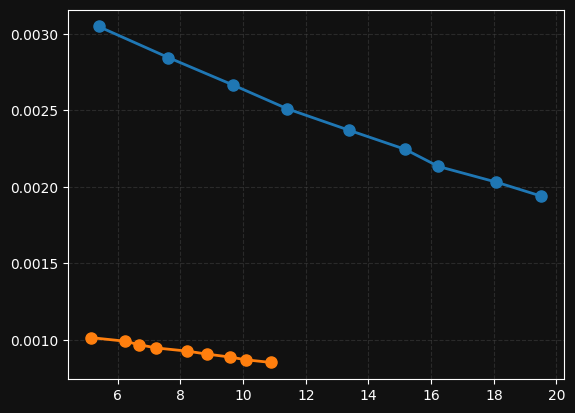

In [6]:
plt.plot(x1, y1, marker='o', markersize=8, linestyle='-', linewidth=2)
plt.plot(x2, y2, marker='o', markersize=8, linestyle='-', linewidth=2)
plt.grid(True)
plt.show()

In [7]:
x1m = np.mean(x1)
y1m = np.mean(y1)
x2m = np.mean(x2)
y2m = np.mean(y2)
m1 = np.sum((x1 - x1m) * (y1 - y1m)) / np.sum((x1 - x1m)**2)
m2 = np.sum((x2 - x2m) * (y2 - y2m)) / np.sum((x2 - x2m)**2)
c1 = y1m - m1 * x1m
c2 = y2m - m2 * x2m
v1 = -v/(25 * m1)
v2 = -v/(75 * m2)
print(v1, v2)
print(c1, m1)

307.59550412655693 279.68912292942355
0.0034368126907126048 -7.851669003999344e-05


In [8]:
from LeastSquare import LeastSquareRegression
model = LeastSquareRegression()
def f(x):
    return np.log(l + e + v * t0 - v * x)
def dfdx(x):
    return -v/(l + e + v * t0 - v * x)
def g(y):
    return np.log(y)
def dgdy(y):
    return 1/y

sigma_t = np.cov(t1)
sigma_f = np.cov(f1)
results = model.fit(t1, f1, f, g, dfdx, dgdy, sigma_t, sigma_f)
print(results)

{'a': np.float64(-1.2131563392151967), 'b': np.float64(9.833465729711506), 'sigma_a': np.float64(28.270921197763258), 'sigma_b': np.float64(87.64763520693447)}


In [9]:
import math
c_s = math.exp(results['b']) / 25
dc_s = c_s * results['sigma_b']
print(c_s, dc_s)

745.8987781289245 65376.26400674212


In [10]:
def p(x):
    return x
def dpdx(x):
    return 1
def q(y):
    return 1/y
def dqdy(y):
    return -1/(y*y)

model2 = LeastSquareRegression()
results2 = model2.fit(t1, f1, p, q, dpdx, dqdy, sigma_t, sigma_f)
c_s2 = -v / (25 * results2['a'])
dcs_2 = v * results2['sigma_a'] / (25 * (results['a'] ** 2))
print(c_s2, dcs_2)

317.6229866651305 3.048145795519091e-05
